# **Planetarium Motion / Kepler´s Laws**

The central idea of this motion is to study the movement of a planet under the gravitational force of the sun. Let's look at the following image for a better understanding.

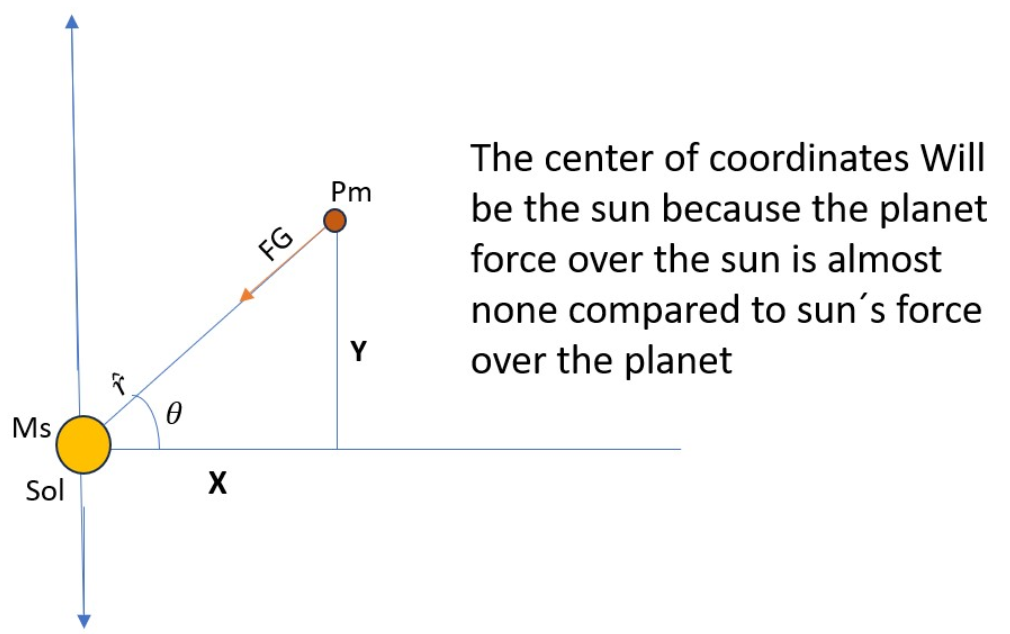

Where $F_{G}$ is the universal gravitational force and is given by:

$$F_{G} = \frac{GM_{s}m}{r^2}$$

Where $M_{s}$ is the mass of the sun, and $m$ is the mass of the planet. If we express this in vector notation:

$$\vec {F}_{G} = - \frac {GM_{s}m}{r^2} \hat{r}$$

Remember that $\hat{r} = \frac {\vec{r}}{r}$. Then:

$$\vec{F_{G}} = - \frac {GM_{s}m}{r^2} \frac {\vec{r}}{r}$$

Now, we apply Newton's second law to this system to find the acceleration and velocity of the planet. This is:

$$- \frac {GM_{s}m}{r^3} \vec{r} = m \vec{a_{m}}$$

The equations that would then describe the acceleration ($(1)$, $(2)$) and velocity ($(3)$, $(4)$):

$$\frac {d v_{x}}{dt} = \frac{-GM_{s}}{r^3} x$$

$$\frac {d v_{y}}{dt} = \frac{-GM_{s}}{r^3} y$$

$$\frac {dx}{dt} = v_{x}$$

$$\frac {dy}{dt} = v_{y}$$

If we transform equations 1 and 2 into Cartesian coordinates:


$$\frac {-GM_{s}} {(x^2+y^2)^{3/2}}x$$

$$\frac {-GM_{s}} {(x^2+y^2)^{3/2}}y$$

These will then be the equations we solve for our planetary system. Before writing the code, it is crucial to clarify the topic of units that will be used for this, as we must be consistent in the units of distances and time. We will use:

* **Time**: Earth years

* **Distance**: Astronomical Units

* **Mass of the sun** $M_{s}$ (Kg) = $2 \times 10^{30} Kg$

Standard gravitational parameter(U.A)= $G \times M_{s} = 39.3926 \frac {UA^{3}}{Yr^{2}}$

Now, the initial conditions of our planetary system will depend on the aphelion of each planet to the sun. It is essential to remember that aphelion is defined as the farthest distance to the sun, but since we are treating our system as if it were a circle, the distance from the sun to the perihelion and the sun to the aphelion is approximately the same. We will use only the aphelion as the initial condition.

The initial conditions would then be given by:

1. $x_{0}$: Aphelion of each planet
2. $y_{0}$: 0 for all
3. $vel_{x_{0}}$: 0 for all
4. $vel_{y_{0}}$: Velocity at the aphelion

The velocity is calculated with:

$$v = \sqrt{\mu \frac{1}{r}}$$

Where $r$ is the distance from the aphelion of each planet to the sun in U.A., and $\mu$ is the standard gravitational parameter described earlier.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Euler-Cromer Method
def calculatePlanetOrbit(initial_position, initial_velocity, time):
    velx, vely = initial_velocity
    posx, posy = initial_position
    pos_x = [posx]
    pos_y = [posy]
    vel_x = [velx]
    vel_y = [vely]

    for i in range(len(time) - 1):
        r2 = posx ** 2 + posy ** 2
        vel_x.append(velx + -((miu * posx) / r2 ** 1.5) * time[1])
        vel_y.append(vely + -((miu * posy) / r2 ** 1.5) * time[1])

        pos_x.append(posx + vel_x[-1] * time[1])
        pos_y.append(posy + vel_y[-1] * time[1])

        posx, posy = pos_x[-1], pos_y[-1]
        velx, vely = vel_x[-1], vel_y[-1]

    return pos_x, pos_y, vel_x, vel_y

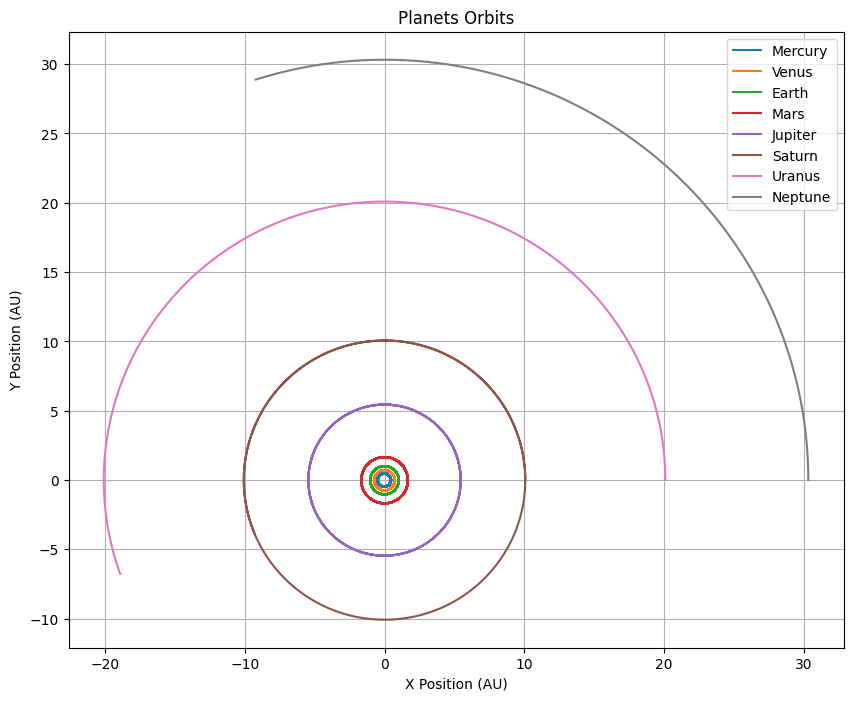

In [3]:
aphelion = [0.47, 0.73, 1.02, 1.67, 5.45, 10.07, 20.09, 30.32]
miu = 39.3926
velocities = []
for i in aphelion:
  velocities.append(np.sqrt(miu * 1/i))

planetsNames = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']

# 168 years
time10 = np.linspace(0, 50, 10000); plt.figure(figsize=(10, 8))

for i in range(len(aphelion)):
    pos_x, pos_y, vel_x, vel_y = calculatePlanetOrbit([aphelion[i], 0], [0, velocities[i]], time10)
    plt.plot(pos_x, pos_y, label=planetsNames[i])

plt.title("Planets Orbits")
plt.xlabel('X Position (AU)'); plt.ylabel('Y Position (AU)')
plt.legend(loc="best"); plt.grid("---")
plt.show()

## **Runge Kutta 4th Order**:

In [4]:
def RK4Planets(x, y, vx, vy, h):
  miu = 39.3926
  fvx = lambda x, y: -miu*x/((x**2 + y**2)**(3/2))
  fvy = lambda x, y: -miu*y/((x**2 + y**2)**(3/2))
  i= 0; time = np.arange(0, 167.5, h)
  while i < len(time):
    k1 = h*vx[i]; q1 = h*vy[i]
    l1 = h*fvx(x[i], y[i]); m1 = h*fvy(x[i], y[i])

    k2 = h*(vx[i] + h/2); q2 = h*(vy[i] + h/2)
    l2 = h*fvx(x[i] + k1/2, y[i] + q1/2); m2 = h*fvy(x[i] + k1/2, y[i] + q1/2)

    k3 = h*(vx[i] + h/2); q3 = h*(vy[i] + h/2)
    l3 = h*fvx(x[i] + k2/2, y[i] + q2/2); m3 = h*fvy(x[i] + k2/2, y[i] + q2/2)

    k4 = h*(vx[i] + l3); q4 = h*(vy[i] + m3)
    l4 = h*fvx(x[i] + k3, y[i] + q3); m4 = h*fvy(x[i] + k3, y[i] + q3)

    x.append( x[i] + (1/6)*(k1 + 2*k2 + 2*k3 + k4) )
    y.append( y[i] + (1/6)*(q1 + 2*q2 + 2*q3 + q4) )
    vx.append( vx[i] + (1/6)*(l1 + 2*l2 + 2*l3 + l4) )
    vy.append( vy[i] + (1/6)*(m1 + 2*m2 + 2*m3 + m4) )
    i+=1
  plt.plot(x,y)
  plt.title("Planets Orbits")
  plt.xlabel('X Position (AU)'); plt.ylabel('Y Position (AU)')
  plt.grid("---")
  x_ini = x[0]; x_fin=x[-1]
  return x_ini, x_fin

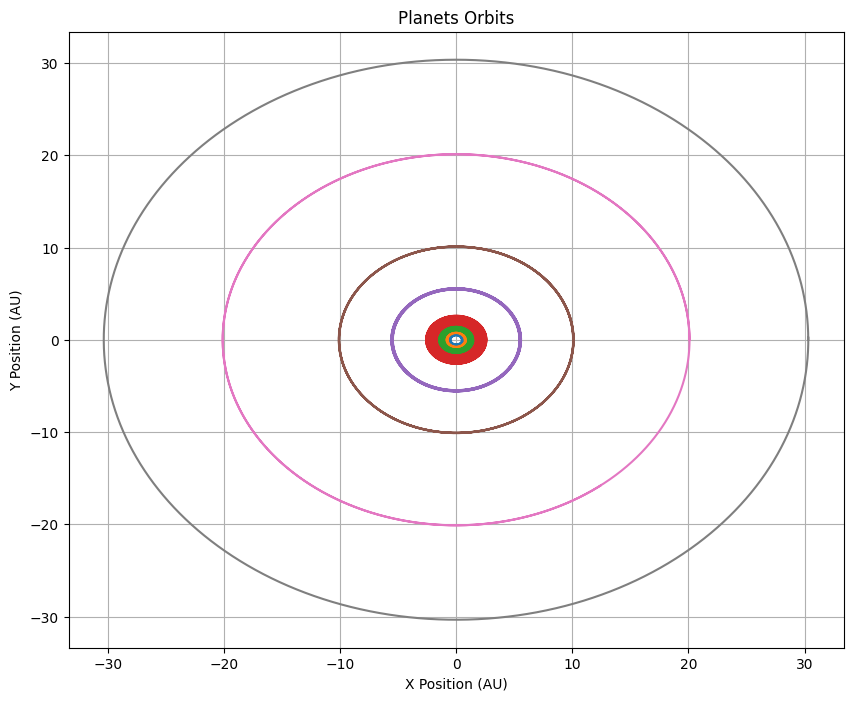

In [5]:
plt.figure(figsize=(10, 8))
mercurio = RK4Planets([0.47], [0], [0], [velocities[0]], 0.001)
venus = RK4Planets([0.73], [0], [0], [velocities[1]], 0.001)
tierra = RK4Planets([1.02], [0], [0], [velocities[2]], 0.001)
marte = RK4Planets([1.67], [0], [0], [velocities[3]], 0.001)
jupiter = RK4Planets([5.45], [0], [0], [velocities[4]], 0.001)
saturno = RK4Planets([10.07], [0], [0], [velocities[5]], 0.001)
urano = RK4Planets([20.09], [0], [0], [velocities[6]], 0.001)
neptuno = RK4Planets([30.32], [0], [0], [velocities[7]], 0.001)

## **Rotation Period of Each Planet**

For this task, we were asked to create a graph of $T^2$ vs $a^3$, where $T^2$ is the period of the planet, and $a^3$ is given by:

$$a^3 = (\frac{aphelion - perihelion}{2})^{3}$$

An attempt was made to create a function that could determine the orbital period of each planet using the positions of each planet. The function did not work correctly because the orbital periods were significantly different. For instance, while one planet completed an orbit in just one year, another took 168 years. This discrepancy made it challenging to develop a code that could calculate the orbits of all planets and simultaneously determine the orbital period of each.

To implement the orbital period function, it would be necessary to take each planet, calculate its orbit over a time not too distant from its known data, allowing the planet to complete a full revolution without overshooting (with some tolerance), and then observe the time taken.

Since I was unable to create this function, I used the known experimental data of the planets to display the orbital period. It's important to note that the formula states that the numerator of $a^{3}$ is the aphelion of the planet minus its perihelion. Since the data values are very similar and none of them have the same significant figures as the other, subtracting them did not yield the most appropriate result. Therefore, in the formula, I only used the aphelion of the planet, i.e., without subtracting the perihelion.

For a better illustration, let's take a look at the code:


In [6]:
perihelion = [0.31, 0.72, 0.98, 1.38, 4.95, 9.01, 18.28, 29.80]
orbit_period = [0.241096, 0.616438, 1.0, 1.88219, 12, 29, 84, 165]
planetsNames = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']

a3 = []
for i in range(8):
  a3.append( ( (aphelion[i]) / 2)**3)

orbi2 = [x**2 for x in orbit_period]

Text(0.5, 1.0, 'Third Kepler´s Law')

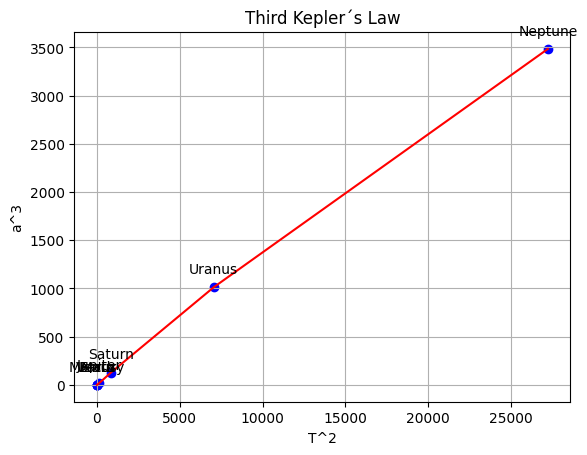

In [7]:
plt.scatter(orbi2, a3, marker='o', c='blue')

for i, planet in enumerate(planetsNames):
    plt.annotate(planet, (orbi2[i], a3[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.plot(orbi2, a3, linestyle='-', color='red')
plt.grid("--"); plt.xlabel("T^2"); plt.ylabel("a^3"); plt.title("Third Kepler´s Law")

And if we were to use the complete formula, that is, aphelion minus perihelion, this would be:

Text(0.5, 1.0, 'Third Kepler´s Law')

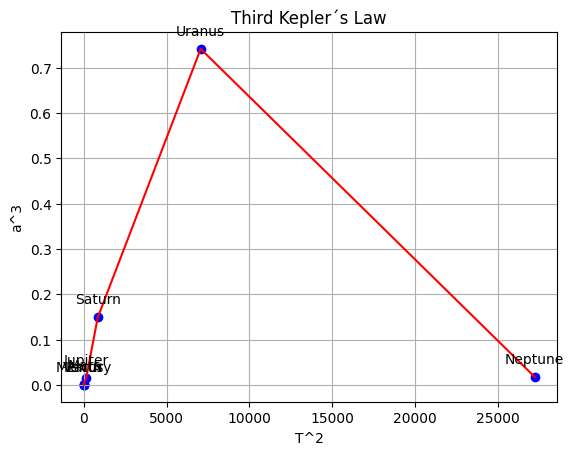

In [8]:
a4 = []
for i in range(8):
  a4.append( ( (aphelion[i] - perihelion[i]) / 2)**3)

orbi2 = [x**2 for x in orbit_period]

plt.scatter(orbi2, a4, marker='o', c='blue')

for i, planet in enumerate(planetsNames):
    plt.annotate(planet, (orbi2[i], a4[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.plot(orbi2, a4, linestyle='-', color='red')
plt.grid("--"); plt.xlabel("T^2"); plt.ylabel("a^3"); plt.title("Third Kepler´s Law")

---

For this animation, we didn't use GlowScript or the HTML functions of Matplotlib, as we did in previous codes; instead, we used the Blender design program. The GIF that will be loaded below is entirely in Blender code. When creating 3D animations of physical phenomena in applications like Blender, which are not specifically designed for physics simulations, it is challenging to ensure that real planetary data (in this specific case) would accurately represent the behavior. Therefore, for the simulation, we manipulated the velocity and force data of the planets. The code is included in this section in the form of images. This is: